In [2]:
'''
Name : Anmesh Choudhury
Roll No: 16NA30003

Assignment 1b
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Iris_Data.csv')
df.head()

'''
You will not import any other library other than these provided.

We provide the iris_dataset for the classification task
There are 4 dependent variables columns(1-4).
The last column (category of the flower) is what we wish to predict

The first part of this task is similar to assignment 1 a
'''
# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):
    
    s = np.random.permutation(X.shape[0])
 
    X1=X[s]
    Y1=Y[s]
    
    return X1,Y1
    pass
X,Y=shuffle_dataset(X,Y)
training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]

150 4


## Defining the Feed Forward Neural Network class

In [4]:
class NeuralNetwork(object):
    
    def __init__(self, input_no, hidden_no, output_no ):

        self.h= np.zeros((hidden_no,1))
        self.w1= np.random.uniform(0,0.01,(input_no,hidden_no))
        self.b1= np.random.uniform(0,0.01,(1,hidden_no))
        self.w2= np.random.uniform(0,.01,(hidden_no,output_no))
        self.b2= np.random.uniform(0,0.01,(1,output_no))
        pass

    
    def forward(self, x):
        self.h=np.maximum(0, np.dot(x, self.w1) + self.b1)
        scores = np.dot(self.h, self.w2) + self.b2   
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return probs
        pass
    
    def backward(self, x, y_train, y_pred, lr):
        row=len(y_train)
        deri = y_pred
        deri[range(row),y_train] -= 1
        deri /=row
        self.w2 += -lr*np.dot(self.h.T, deri)
        self.b2 += -lr*np.sum(deri, axis=0, keepdims=True)
        d_hidden = np.dot(deri, self.w2.T)
        d_hidden[self.h <= 0] = 0
        self.w1 += -lr*np.dot(x.T, d_hidden)
        self.b1 += -lr*np.sum(d_hidden, axis=0, keepdims=True)
        pass
             

        
def crossEntropy_loss(y_pred, y_train):
    sum=0
    n=len(y_train)
    for i in range(n):
        sum+=-np.log(y_pred[i][y_train[i]])
    loss=sum/n
    return loss
    pass

def accuracy(y_pred,y_train):
    c = np.argmax(y_pred, axis=1)
    return (np.mean(c == y_train))
    pass
        


Loss fuction decrease after 1000 epochs of training


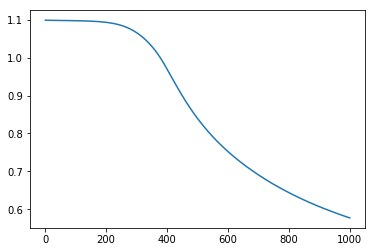

Final train_loss 0.577209015179
Final train_accuracy 0.7
Testloss 0.597518075134
Accuracy is 0.666666666667


In [5]:
# Initialize the neural network model and specify the parameters 

cols=4
hidden_nodes=3
nnobj= NeuralNetwork(cols,hidden_nodes,3)       
epochs = 1000
learning_rate = 1e-2
loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    yPred= nnobj.forward(X_train)
    train_loss= crossEntropy_loss(yPred,y_train)
    if e==0 or (e+1)%10==0:
        loss_history.append(train_loss)
        epoch_history.append(e+1)
        
    nnobj.backward(X_train, y_train,yPred, lr=learning_rate) #lmda=lmda)
    

yPred= nnobj.forward(X_train)
train_accuracy= accuracy(yPred,y_train)
y_pred_test=nnobj.forward(X_test)
test_loss= crossEntropy_loss(y_pred_test,y_test)
test_accuracy= accuracy(y_pred_test,y_test)
print('Loss fuction decrease after ' + str(epochs) + ' epochs of training')

plt.plot(epoch_history, loss_history)
plt.show()
    
print("Final train_loss "+ str(train_loss))    
print("Final train_accuracy "+ str(train_accuracy))    
print("Testloss " + str(test_loss))
print("Accuracy is "+ str(test_accuracy))

        
            